<a href="https://colab.research.google.com/github/swethakannan02/STUDENT-PERFORMANCE_PREDICTION/blob/main/MINI_PROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***EFFECT OF GADGET USAGE WITH ACADEMIC PERFORMANCE***

LOGISTIC REGRESSION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [ ]:
data=pd.read_csv('/content/DATASET FINAL.csv')

In [ ]:
data

,stu_id,AVERAGE_TIME,GADGETS_USED,YEAR,CGPA,AFFECT ACADEMICS,PURPOSE,SEX,TRAVEL TIME,EXTRA_COURSES
0,1,0-3hrs,"Mobile Phones, Laptops, Tabs",2nd year,9 - 10 CGPA,no,Academic,Female,0-1hr,Yes
1,2,3-6hrs,"Mobile Phones, Laptops, Tabs",2nd year,6 - 8 CGPA,no,Academic,Female,0-1hr,Yes
2,3,More than 9hrs,"Mobile Phones, Laptops",2nd year,less than 6,yes,"Pass Time Activities(Movies,games)",Female,0-1hr,No
3,4,More than 9hrs,"Mobile Phones, Laptops",2nd year,less than 6,yes,social Media,Female,2hrs,Yes
4,5,6-9hrs,"Mobile Phones, Laptops",2nd year,6 - 8 CGPA,yes,"Pass Time Activities(Movies,games)",Female,0-1hr,Yes
...,...,...,...,...,...,...,...,...,...,...
185,186,More than 9hrs,"Mobile Phones, Laptops, Other",2nd year,less than 6,yes,"Pass Time Activities(Movies,games)",Female,0-1hr,Yes
186,187,0-3hrs,"Mobile Phones, Laptops",2nd year,9 - 10 CGPA,no,social Media,Female,0-1hr,Yes
187,188,0-3hrs,"Mobile Phones, Laptops",2nd year,6 - 8 CGPA,no,Academic,Female,Hosteller,No
188,189,3-6hrs,"Mobile Phones, Laptops, Other",2nd year,9 - 10 CGPA,yes,social Media,Female,2hrs,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stu_id            190 non-null    int64 
 1   AVERAGE_TIME      190 non-null    object
 2   GADGETS_USED      190 non-null    object
 3   YEAR              190 non-null    object
 4   CGPA              190 non-null    object
 5   AFFECT ACADEMICS  190 non-null    object
 6   PURPOSE           190 non-null    object
 7   SEX               190 non-null    object
 8   TRAVEL TIME       190 non-null    object
 9   EXTRA_COURSES     190 non-null    object
dtypes: int64(1), object(9)
memory usage: 15.0+ KB


In [ ]:
data.iloc[0:5,0:10]

,stu_id,AVERAGE_TIME,GADGETS_USED,YEAR,CGPA,AFFECT ACADEMICS,PURPOSE,SEX,TRAVEL TIME,EXTRA_COURSES
0,1,0-3hrs,"Mobile Phones, Laptops, Tabs",2nd year,9 - 10 CGPA,no,Academic,Female,0-1hr,Yes
1,2,3-6hrs,"Mobile Phones, Laptops, Tabs",2nd year,6 - 8 CGPA,no,Academic,Female,0-1hr,Yes
2,3,More than 9hrs,"Mobile Phones, Laptops",2nd year,less than 6,yes,"Pass Time Activities(Movies,games)",Female,0-1hr,No
3,4,More than 9hrs,"Mobile Phones, Laptops",2nd year,less than 6,yes,social Media,Female,2hrs,Yes
4,5,6-9hrs,"Mobile Phones, Laptops",2nd year,6 - 8 CGPA,yes,"Pass Time Activities(Movies,games)",Female,0-1hr,Yes


In [ ]:
data['AVERAGE_TIME'].unique()

array(['0-3hrs', '3-6hrs', 'More than 9hrs', '6-9hrs'], dtype=object)

In [ ]:
data['AVERAGE_TIME'].replace(['0-3hrs','3-6hrs','More than 9hrs','6-9hrs'],
                             [0,1,3,2], inplace=True)

In [ ]:
data['GADGETS_USED'].unique()

array(['Mobile Phones, Laptops, Tabs', 'Mobile Phones, Laptops',
       'Mobile Phones', 'Mobile Phones, Laptops, Other',
       'Mobile Phones, Other', 'Laptops', 'Tabs',
       'Mobile Phones, Laptops, Tabs, Other', 'Other',
       'Mobile Phones, Tabs', 'Mobile Phones, Tabs, Other',
       'Mobile phones, Laptops'], dtype=object)

In [ ]:
data['GADGETS_USED'].replace(['Mobile Phones, Laptops, Tabs', 'Mobile Phones, Laptops',
       'Mobile Phones', 'Mobile Phones, Laptops, Other',
       'Mobile Phones, Other', 'Laptops', 'Tabs',
       'Mobile Phones, Laptops, Tabs, Other', 'Other',
       'Mobile Phones, Tabs', 'Mobile Phones, Tabs, Other',
       'Mobile phones, Laptops'],
       [0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)

In [ ]:
data['YEAR'].unique()

array(['2nd year', '1st year', 'Final year', '3rd year'], dtype=object)

In [ ]:
data['YEAR'].replace(['2nd year','1st year','Final year','3rd year'],
                     [2,1,4,3],inplace=True)

In [ ]:
data['CGPA'].unique()

array(['9 - 10 CGPA', '6 - 8 CGPA', 'less than 6', '9-10 CGPA',
       '6-8 CGPA'], dtype=object)

In [ ]:
data['CGPA'].replace(['6 - 8 CGPA', 'less than 6', '9-10 CGPA', '6-8 CGPA',
       '9 - 10 CGPA'],[2,3,1,2,1],inplace=True)



In [ ]:
data['AFFECT ACADEMICS'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['AFFECT ACADEMICS'].replace(['yes','no'],
                                 [0,1],inplace=True)

In [ ]:
data['PURPOSE'].unique()

array(['Academic', 'Pass Time Activities(Movies,games)', 'social Media'],
      dtype=object)

In [ ]:
data['PURPOSE'].replace(['Academic', 'Pass Time Activities(Movies,games)', 'social Media'],
                        [0,1,2],inplace=True)

In [ ]:
data['SEX'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data['SEX'].replace(['Female','Male'],
                    [0,1],inplace=True)

In [ ]:
data['TRAVEL TIME'].unique()

array(['0-1hr', '2hrs', 'Hosteller'], dtype=object)

In [ ]:
data['TRAVEL TIME'].replace(['0-1hr', '2hrs', 'Hosteller'],
                            [1,2,0],inplace=True)

In [ ]:
data['EXTRA_COURSES'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data['EXTRA_COURSES'].replace(['Yes','No'],
                              [0,1],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   stu_id            190 non-null    int64
 1   AVERAGE_TIME      190 non-null    int64
 2   GADGETS_USED      190 non-null    int64
 3   YEAR              190 non-null    int64
 4   CGPA              190 non-null    int64
 5   AFFECT ACADEMICS  190 non-null    int64
 6   PURPOSE           190 non-null    int64
 7   SEX               190 non-null    int64
 8   TRAVEL TIME       190 non-null    int64
 9   EXTRA_COURSES     190 non-null    int64
dtypes: int64(10)
memory usage: 15.0 KB


In [ ]:
data

,stu_id,AVERAGE_TIME,GADGETS_USED,YEAR,CGPA,AFFECT ACADEMICS,PURPOSE,SEX,TRAVEL TIME,EXTRA_COURSES
0,1,0,0,2,1,1,0,0,1,0
1,2,1,0,2,2,1,0,0,1,0
2,3,3,1,2,3,0,1,0,1,1
3,4,3,1,2,3,0,2,0,2,0
4,5,2,1,2,2,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
185,186,3,3,2,3,0,1,0,1,0
186,187,0,1,2,1,1,2,0,1,0
187,188,0,1,2,2,1,0,0,0,1
188,189,1,3,2,1,0,2,0,2,1


In [ ]:

data.head()

,stu_id,AVERAGE_TIME,GADGETS_USED,YEAR,CGPA,AFFECT ACADEMICS,PURPOSE,SEX,TRAVEL TIME,EXTRA_COURSES
0,1,0,0,2,1,1,0,0,1,0
1,2,1,0,2,2,1,0,0,1,0
2,3,3,1,2,3,0,1,0,1,1
3,4,3,1,2,3,0,2,0,2,0
4,5,2,1,2,2,0,1,0,1,0


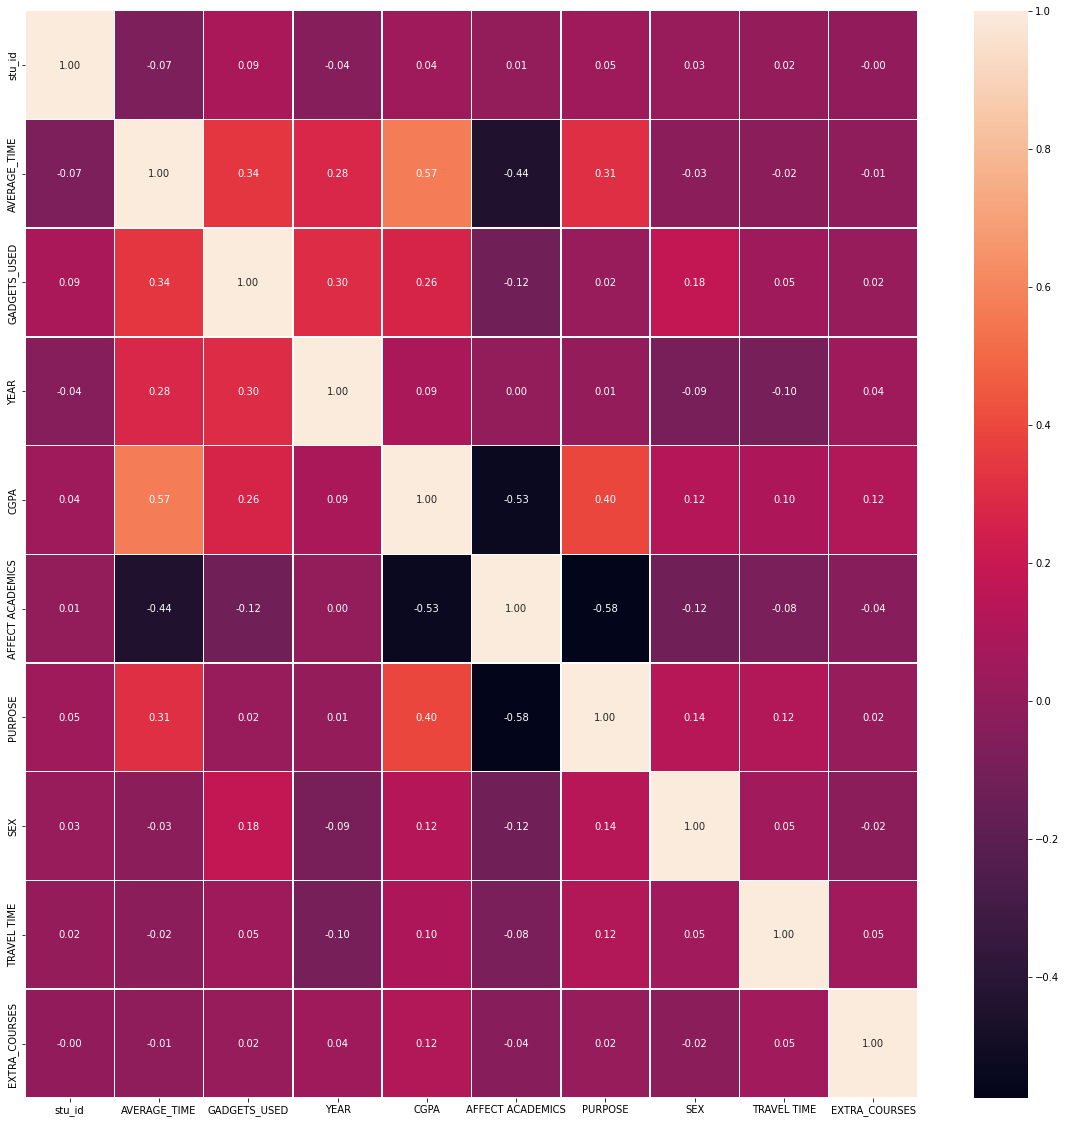

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [ ]:
data.corr()

,stu_id,AVERAGE_TIME,GADGETS_USED,YEAR,CGPA,AFFECT ACADEMICS,PURPOSE,SEX,TRAVEL TIME,EXTRA_COURSES
stu_id,1.000000,-0.074820,0.085215,-0.040493,0.044071,0.006442,0.051093,0.025072,0.015140,-0.002498
AVERAGE_TIME,-0.074820,1.000000,0.338072,0.278241,0.574951,-0.441912,0.312054,-0.027221,-0.016022,-0.008306
GADGETS_USED,0.085215,0.338072,1.000000,0.299114,0.262763,-0.119597,0.023958,0.179234,0.049811,0.020660
YEAR,-0.040493,0.278241,0.299114,1.000000,0.087296,0.004302,0.011644,-0.090822,-0.097742,0.042210
CGPA,0.044071,0.574951,0.262763,0.087296,1.000000,-0.529932,0.395487,0.124954,0.100724,0.119125
AFFECT ACADEMICS,0.006442,-0.441912,-0.119597,0.004302,-0.529932,1.000000,-0.575724,-0.120567,-0.084754,-0.038913
PURPOSE,0.051093,0.312054,0.023958,0.011644,0.395487,-0.575724,1.000000,0.138074,0.117976,0.017825
SEX,0.025072,-0.027221,0.179234,-0.090822,0.124954,-0.120567,0.138074,1.000000,0.054820,-0.021517
TRAVEL TIME,0.015140,-0.016022,0.049811,-0.097742,0.100724,-0.084754,0.117976,0.054820,1.000000,0.052893
EXTRA_COURSES,-0.002498,-0.008306,0.020660,0.042210,0.119125,-0.038913,0.017825,-0.021517,0.052893,1.000000


In [ ]:
X=data.drop(['AFFECT ACADEMICS','stu_id','YEAR','TRAVEL TIME'], axis=1)
Y=data['AFFECT ACADEMICS']

In [ ]:
X.columns

Index(['AVERAGE_TIME', 'GADGETS_USED', 'CGPA', 'PURPOSE', 'SEX',
       'EXTRA_COURSES'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, Y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, Y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(Y_test,rf_predicted))
print(confusion_matrix(Y_test,rf_predicted))
print(classification_report(Y_test,rf_predicted))

Random Forest Score: 
 92.11
Random Forest Test Score: 
 78.29
Accuracy: 
 0.7828947368421053
[[58 23]
 [10 61]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        81
           1       0.73      0.86      0.79        71

    accuracy                           0.78       152
   macro avg       0.79      0.79      0.78       152
weighted avg       0.79      0.78      0.78       152



In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
log_predicted= logreg.predict(X_test)
logreg_score = round(logreg.score(X_train, Y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, Y_test) * 100, 2)
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Accuracy: \n', accuracy_score(Y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(Y_test,log_predicted))
print('Classification Report: \n', classification_report(Y_test,log_predicted))

Logistic Regression Training Score: 
 86.84
Logistic Regression Test Score: 
 79.61
Accuracy: 
 0.7960526315789473
Confusion Matrix: 
 [[62 19]
 [12 59]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80        81
           1       0.76      0.83      0.79        71

    accuracy                           0.80       152
   macro avg       0.80      0.80      0.80       152
weighted avg       0.80      0.80      0.80       152



In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
svm_model_score = round(svm_model.score(X_train, Y_train) * 100, 2)
Y_predict = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test,Y_predict)*100
print("Accuracy:",svm_accuracy)
cm = confusion_matrix(Y_test,Y_predict)
print("Confusion Matrix is :", cm)

Accuracy: 80.92105263157895
Confusion Matrix is : [[64 17]
 [12 59]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
knn = KNeighborsClassifier()

params = {
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
    "algorithm":["ball_tree","kd_tree","brute"],
    "leaf_size":[25,30,35],
    "p":[1,2]
}

gs = GridSearchCV(knn, param_grid=params)
knn_model = gs.fit(X_train,Y_train)

knn_model_score = round(knn_model.score(X_train, Y_train) * 100, 2)
Y_predict = knn_model.predict(X_test)
knn_accuracy = accuracy_score(Y_test,Y_predict)*100
print("Accuracy:",knn_accuracy)
cm = confusion_matrix(Y_test,Y_predict)
print("Confusion Matrix is :", cm)

Accuracy: 78.28947368421053
Confusion Matrix is : [[65 16]
 [17 54]]


In [ ]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression','Random Forest','SVM Model', 'KNN'],
    'Score': [ logreg_score, random_forest_score,svm_model_score,knn_model_score],
    'Test Score': [ logreg_score_test,random_forest_score_test,svm_accuracy,knn_accuracy]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,SVM Model,86.84,80.921053
0,Logistic Regression,86.84,79.610000
1,Random Forest,92.11,78.290000
3,KNN,86.84,78.289474
